<a href="https://colab.research.google.com/github/marcinwolter/Tracking_student2020/blob/master/Fit_with_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yerr =  [0.3 0.1 0.1 0.2 0.3 0.1 0.2]
Fit with f(x)=ax+b
a= 1.0005293493939011 +/- 0.010850076927243293
b= 0.03202564394632545 +/- 0.03825762257457479


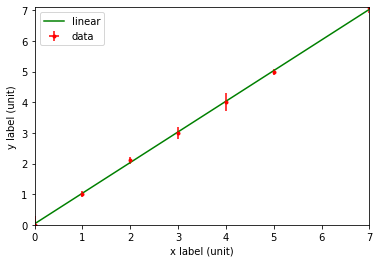

In [22]:
import numpy as np
from numpy import *
import pylab
from scipy.optimize import curve_fit
from scipy import stats

# get data
fn = 'cooltemp.dat'
x, y, xerr, yerr = loadtxt(fn,unpack=True, usecols=[0,1,2,3])
yerr *= 1.
print("yerr = ",yerr)


## FIT ##
print('Fit with f(x)=ax+b')
def fit(x,a,b): 
     return a*x+b

popt,pcov=curve_fit(fit,x,y,p0=(0.0,0.0),sigma=yerr) 
a=popt[0]; err_a=np.sqrt(pcov[0,0])
b=popt[1]; err_b=np.sqrt(pcov[1,1])
print('a=',a,"+/-",err_a)
print('b=',b,"+/-",err_b)

pn = poly1d(popt)

# plot data and fit
xx = linspace(0, max(x), 500)
pylab.plot(xx, pn(xx),'-g')
pylab.errorbar(x, y, yerr, xerr, fmt='r.')

# customise graph
pylab.legend(['linear','data'])
pylab.axis([0,max(x),0,max(y)])
pylab.xlabel('x label (unit)')
pylab.ylabel('y label (unit)')

pylab.show()